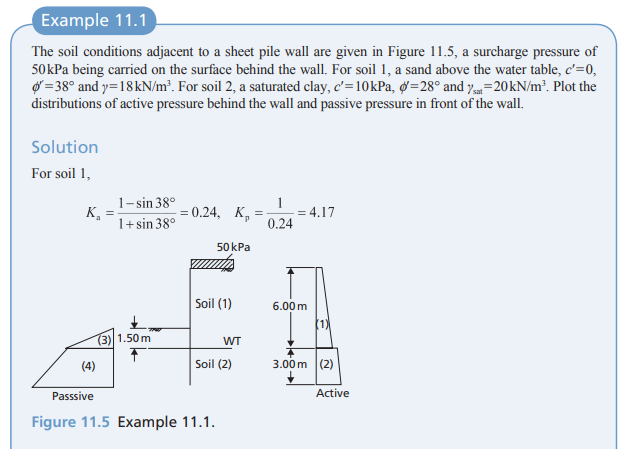

In [1]:
import pandas as pd

from geotechpy.soil_profile import SoilProfile
from geotechpy.lateral_earth_pressure import LateralEarthPressure

# Show all columns
pd.set_option('display.max_columns', None)

In [2]:
# Declare the units system for the soil profile
units = "metric"  # "imperial" or "metric"

# Declare the surcharge load for right side of wall
surcharge_right = 50 # kPa

# Declare the surcharge load for left side of wall
surcharge_left = 0 # kPa

# Declare the water table elevation
water_table_elevation = 94

# Declare the backfill slope angle
backfill_slope_angle = 0

# Declare the wall back face angle, degrees from vertical
wall_back_face_angle = 0

# Declare the wall interface friction angle, degrees
wall_interface_friction_angle = 0

In [3]:
# Read the right side soil profile data from a CSV file
sp_right_df = pd.read_csv("soil_profile_Craig_11_1_right.csv")

sp_right_df

,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion
0,1,100,94,Sand,18,20,38,0,NaN,NaN
1,2,94,91,Clay,19,20,28,10,NaN,NaN


In [4]:
# Create an instance of the SoilProfile class for the right side soil profile
soil_profile_right = SoilProfile(sp_right_df, surcharge_right, water_table_elevation, units)
soil_profile_right.calculate_all()

soil_profile_right.dataframe

,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion,effective_unit_weight,total_unit_weight,layer_height,top_effective_stress,bottom_effective_stress,middle_effective_stress,top_water_pressure,bottom_water_pressure,top_total_stress,bottom_total_stress,middle_total_stress
0,1,100,94,Sand,18,20,38,0,NaN,NaN,18.00,18,6,50.0,158.00,104.000,0.0,0.00,50.0,158.0,104.0
1,2,94,91,Clay,19,20,28,10,NaN,NaN,10.19,20,3,158.0,188.57,173.285,0.0,29.43,158.0,218.0,188.0


In [5]:
right_df = soil_profile_right.dataframe

rep_right = LateralEarthPressure(
    right_df,
    backfill_slope_angle,
    wall_back_face_angle,
    wall_interface_friction_angle,
    units,
)

rep_right.calculate_rankine_active_all()

right_df

,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion,effective_unit_weight,total_unit_weight,layer_height,top_effective_stress,bottom_effective_stress,middle_effective_stress,top_water_pressure,bottom_water_pressure,top_total_stress,bottom_total_stress,middle_total_stress,active_coefficient,top_active_pressure,bottom_active_pressure,active_force,active_force_elevation
0,1,100,94,Sand,18,20,38,0,NaN,NaN,18.00,18,6,50.0,158.00,104.000,0.0,0.00,50.0,158.0,104.0,0.238,11.9,37.6,148.5,96.5
1,2,94,91,Clay,19,20,28,10,NaN,NaN,10.19,20,3,158.0,188.57,173.285,0.0,29.43,158.0,218.0,188.0,0.361,45.0,56.1,151.6,92.4


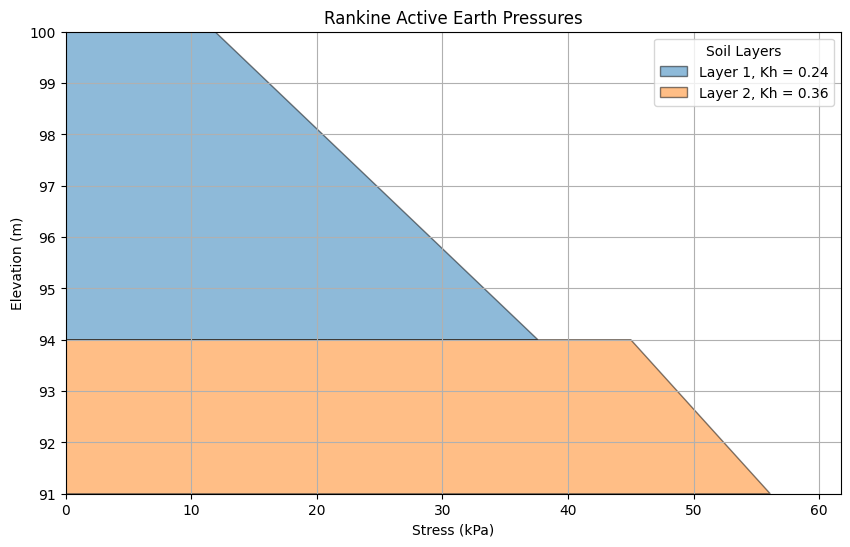

In [6]:
rep_right.plot_rankine_active_pressures()

In [7]:
# Read the left side soil profile data from a CSV file
sp_left_df = pd.read_csv("soil_profile_Craig_11_1_left.csv")

sp_left_df

,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion
0,1,95.5,94,Sand,18,20,38,0,NaN,NaN
1,2,94.0,91,Clay,19,20,28,10,NaN,NaN


In [8]:
# Create an instance of the SoilProfile class for the left side soil profile
soil_profile_left = SoilProfile(sp_left_df, surcharge_left, water_table_elevation, units)
soil_profile_left.calculate_all()

soil_profile_left.dataframe

,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion,effective_unit_weight,total_unit_weight,layer_height,top_effective_stress,bottom_effective_stress,middle_effective_stress,top_water_pressure,bottom_water_pressure,top_total_stress,bottom_total_stress,middle_total_stress
0,1,95.5,94,Sand,18,20,38,0,NaN,NaN,18.00,18,1.5,0.0,27.00,13.500,0.0,0.00,0.0,27.0,13.5
1,2,94.0,91,Clay,19,20,28,10,NaN,NaN,10.19,20,3.0,27.0,57.57,42.285,0.0,29.43,27.0,87.0,57.0


In [9]:
left_df = soil_profile_left.dataframe

rep_left = LateralEarthPressure(
    left_df,
    backfill_slope_angle,
    wall_back_face_angle,
    wall_interface_friction_angle,
    units,
)

rep_left.calculate_rankine_passive_all()

left_df

,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion,effective_unit_weight,total_unit_weight,layer_height,top_effective_stress,bottom_effective_stress,middle_effective_stress,top_water_pressure,bottom_water_pressure,top_total_stress,bottom_total_stress,middle_total_stress,passive_coefficient,top_passive_pressure,bottom_passive_pressure,passive_force,passive_force_elevation
0,1,95.5,94,Sand,18,20,38,0,NaN,NaN,18.00,18,1.5,0.0,27.00,13.500,0.0,0.00,0.0,27.0,13.5,4.204,0.0,113.5,85.1,94.5
1,2,94.0,91,Clay,19,20,28,10,NaN,NaN,10.19,20,3.0,27.0,57.57,42.285,0.0,29.43,27.0,87.0,57.0,2.770,108.1,192.8,451.4,92.4


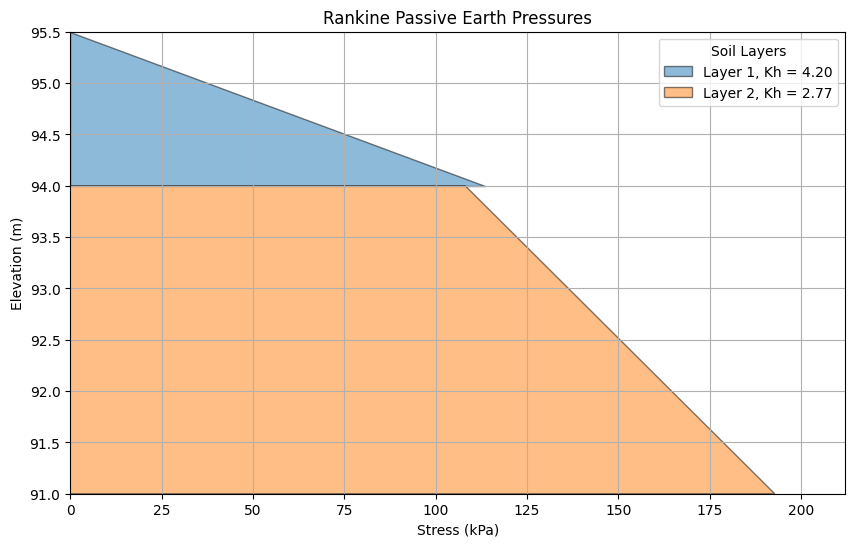

In [10]:
rep_left.plot_rankine_passive_pressures()

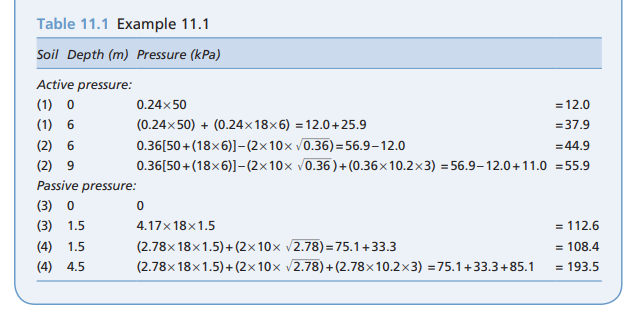